In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics 

df = pd.read_csv('./Datasets/titanic.csv')

In [3]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].max()

Sex
female    60.0
male      71.0
Name: Age, dtype: float64

In [4]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


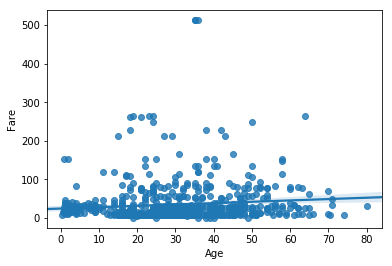

In [5]:
sb.regplot(x = 'Age', y = 'Fare', data = df)

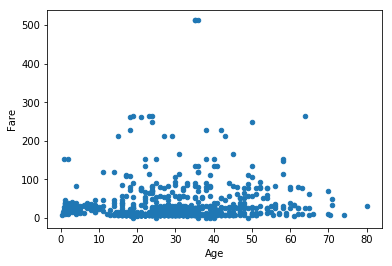

In [6]:
df.plot.scatter(x = 'Age', y = 'Fare')

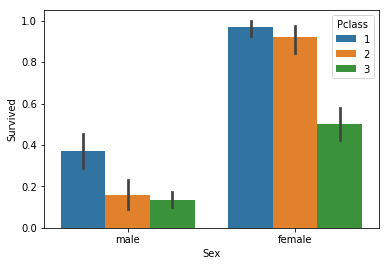

In [7]:
sb.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = df)

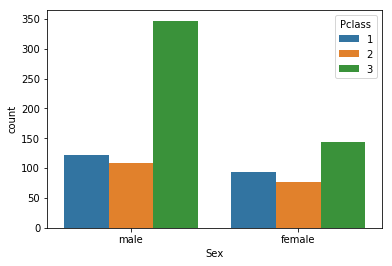

In [8]:
sb.countplot(x = "Sex", hue = "Pclass", data = df)

In [9]:
len(df[(df['Sex'] == "female") & (df['Survived'] == 1) & (df['Pclass'] == 1)])/len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])

0.9680851063829787

In [10]:
len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Pclass'] == 1)])


91

In [11]:
len(df[(df['Sex'] == "female") & (df['Pclass'] == 1)])


94

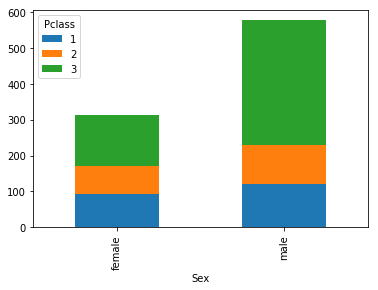

In [12]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)


In [13]:
df.groupby(['Sex'])['Pclass'].value_counts().unstack()


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [14]:
df.groupby(['Sex'])['Pclass'].value_counts()


Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

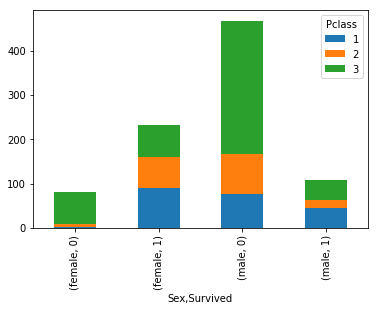

In [15]:
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked = True)


In [16]:
pd.crosstab(df['Sex'], df['Pclass'])


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [17]:
pd.crosstab(df['Sex'], df['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
pd.crosstab(df['Sex'], df['Embarked'])


Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


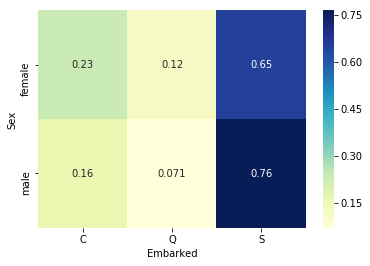

In [20]:
sb.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize = 'index'), cmap ='YlGnBu', annot = True)


In [21]:
adf = pd.DataFrame(data = {'x1': ['A', 'B', 'C'], 'x2': [1, 2, 3]})


In [22]:
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [24]:
bdf = pd.DataFrame(data = {'x1': ['A', 'B', 'D'], 'x3': ['T', 'F', 'T']})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [25]:
pd.merge(adf, bdf, how='left')


,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [26]:
pd.merge(adf, bdf, how='right')


,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [27]:
pd.merge(adf, bdf, how='inner')


,x1,x2,x3
0,A,1,T
1,B,2,F


In [28]:
pd.merge(adf, bdf, how='outer')


,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [29]:
pd.concat([adf, bdf], sort = True)


,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [30]:
pd.concat([adf, bdf], axis = 1)


,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [31]:
cdf = pd.DataFrame(data = {'x1': ['A', 'B', 'C'], 'x3': ['T', 'F', 'T']})
cdf

,x1,x3
0,A,T
1,B,F
2,C,T


In [32]:
pd.concat([adf, cdf], axis = 1)


,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,C,T


In [33]:
pd.concat([adf, cdf], sort = False)


,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,C,NaN,T


In [34]:
pd.merge(adf, cdf, how = 'left')


,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,T


In [35]:
import numpy as np


In [36]:
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],'b': list('abdce'), 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})


In [37]:
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [38]:
melted = pd.melt(df, id_vars = ['weekday'], var_name = "Person", value_name = "Score")


In [39]:
melted

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11
